In [ ]:
# Lab 2: Basic Arithmetic Operations on Images
# Install if needed (uncomment and run once):
# %pip install opencv-python matplotlib

import cv2
import matplotlib.pyplot as plt
import os

# --- Set your image path here ---
# Use 'image.jpg', 'fruit basket.jpg', or full path to your image
IMAGE_PATH = 'image.jpg'
if not os.path.exists(IMAGE_PATH):
    IMAGE_PATH = 'sealion_hero.png'
if not os.path.exists(IMAGE_PATH):
    raise FileNotFoundError(
        "No image found. Place 'image.jpg' or 'fruit basket.jpg' in this notebook's folder:\n"
        + os.path.abspath('.')
    )

def load_rgb(image_path):
    """Load image and convert BGR to RGB for correct display."""
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Cannot read image: {image_path}")
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

image_RGB = load_rgb(IMAGE_PATH)
print(f"Loaded: {IMAGE_PATH}, shape: {image_RGB.shape}")

Loaded: sealion_hero.png, shape: (1398, 1920, 3)


## Part 1: Subtracting an Intensity from an Image
Subtracting a constant from all pixels **darkens** the image.

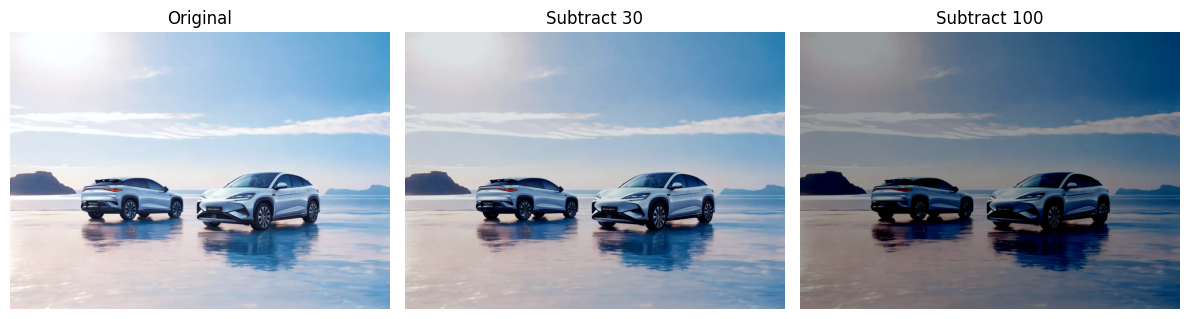

In [ ]:
# Step 1: Subtract different intensity values (Task 1.1 & 1.2)
# Try 30, 100 - more subtraction = darker (pixel values decrease, toward black)
values = [30, 100]
fig, axes = plt.subplots(1, len(values) + 1, figsize=(4 * (len(values) + 1), 4))
axes[0].imshow(image_RGB)
axes[0].set_title('Original')
axes[0].axis('off')
for i, val in enumerate(values):
    sub_img = cv2.subtract(image_RGB, val)
    axes[i + 1].imshow(sub_img)
    axes[i + 1].set_title(f'Subtract {val}')
    axes[i + 1].axis('off')
plt.tight_layout()
plt.show()
# Why darker? Pixel intensities (0-255) get smaller; 0 = black, so image appears darker.

In [1]:
# Task 1.3: Reduce intensities of the RED channel only
img_bgr = cv2.imread(IMAGE_PATH)
b, g, r = cv2.split(img_bgr)
r_reduced = cv2.subtract(r, 100)  # subtract from Red channel only
img_red_reduced = cv2.merge([b, g, r_reduced])
img_red_reduced_rgb = cv2.cvtColor(img_red_reduced, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].imshow(image_RGB)
axes[0].set_title('Original')
axes[0].axis('off')
axes[1].imshow(img_red_reduced_rgb)
axes[1].set_title('Red channel only (-100)')
axes[1].axis('off')
plt.tight_layout()
plt.show()

NameError: name 'cv2' is not defined

## Part 2: Adding an Intensity to an Image
Adding a constant to all pixels **brightens** the image.

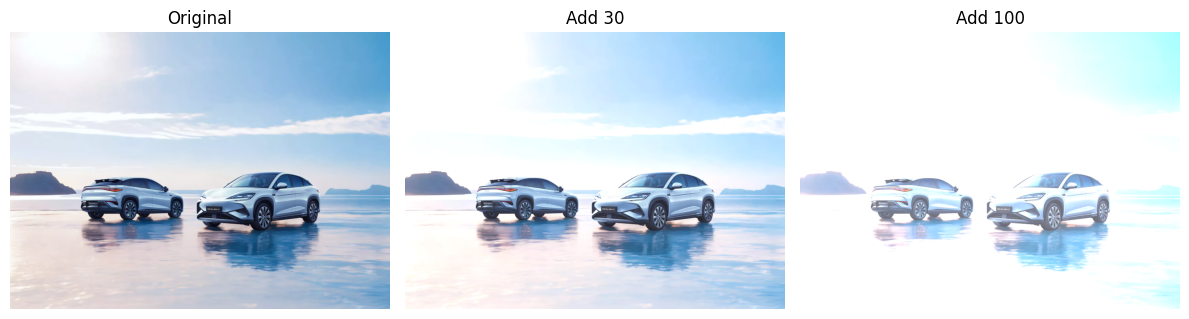

In [ ]:
# Step 2: Add different intensity values (Task 2.4 & 2.5)
# Try 30, 100 - more addition = brighter (pixel values increase, toward white)
values = [30, 100]
fig, axes = plt.subplots(1, len(values) + 1, figsize=(4 * (len(values) + 1), 4))
axes[0].imshow(image_RGB)
axes[0].set_title('Original')
axes[0].axis('off')
for i, val in enumerate(values):
    add_img = cv2.add(image_RGB, val)
    axes[i + 1].imshow(add_img)
    axes[i + 1].set_title(f'Add {val}')
    axes[i + 1].axis('off')
plt.tight_layout()
plt.show()
# Why brighter? Pixel intensities increase toward 255 (white); saturated pixels clip at 255.

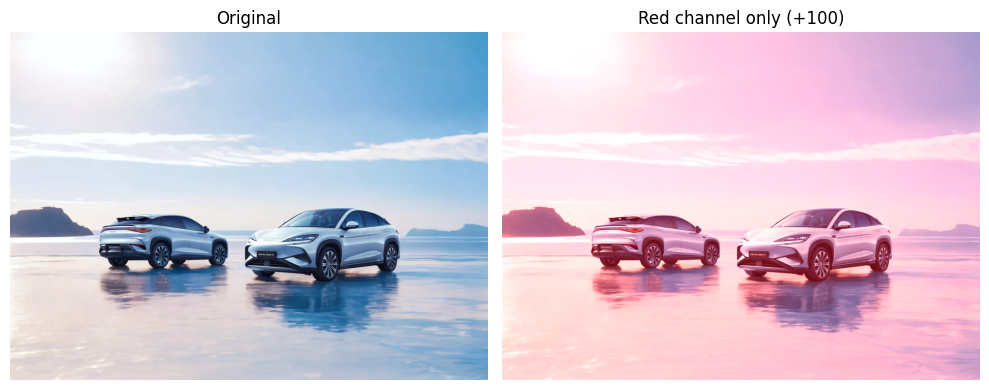

In [ ]:
# Task 2.6: Increase intensities of the RED channel only
img_bgr = cv2.imread(IMAGE_PATH)
b, g, r = cv2.split(img_bgr)
r_added = cv2.add(r, 100)  # add to Red channel only
img_red_added = cv2.merge([b, g, r_added])
img_red_added_rgb = cv2.cvtColor(img_red_added, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].imshow(image_RGB)
axes[0].set_title('Original')
axes[0].axis('off')
axes[1].imshow(img_red_added_rgb)
axes[1].set_title('Red channel only (+100)')
axes[1].axis('off')
plt.tight_layout()
plt.show()

## Part 3: Multiplying an Image by a Constant
Multiplication changes **contrast**: factor > 1 increases it, factor < 1 decreases it.

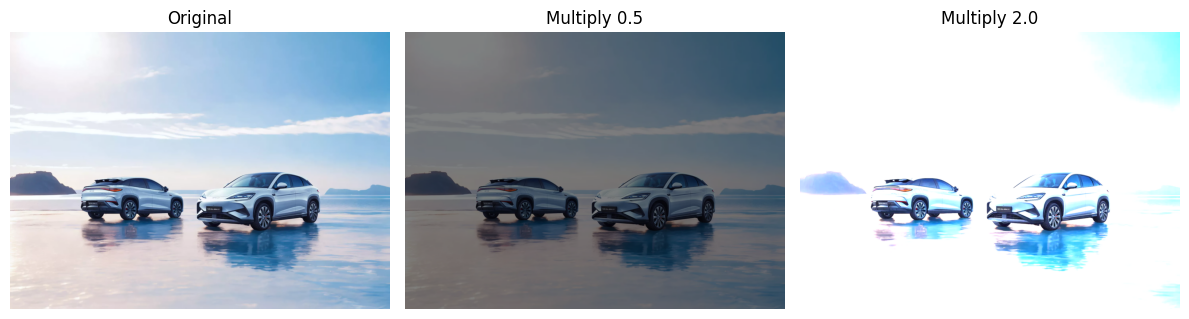

In [ ]:
# Step 3: Multiply by different factors (Task 3.1 & 3.2)
# 0.5 = darker/lower contrast; 2.0 = brighter/higher contrast (values clip at 255)
factors = [0.5, 2.0]
fig, axes = plt.subplots(1, len(factors) + 1, figsize=(4 * (len(factors) + 1), 4))
axes[0].imshow(image_RGB)
axes[0].set_title('Original')
axes[0].axis('off')
for i, f in enumerate(factors):
    mult_img = cv2.multiply(image_RGB, f)
    axes[i + 1].imshow(mult_img)
    axes[i + 1].set_title(f'Multiply {f}')
    axes[i + 1].axis('off')
plt.tight_layout()
plt.show()
# Factor > 1: pixel values scale up -> brighter, more contrast (darks stay dark, brights get brighter).
# Factor < 1: pixel values scale down -> darker, less contrast (range compresses).

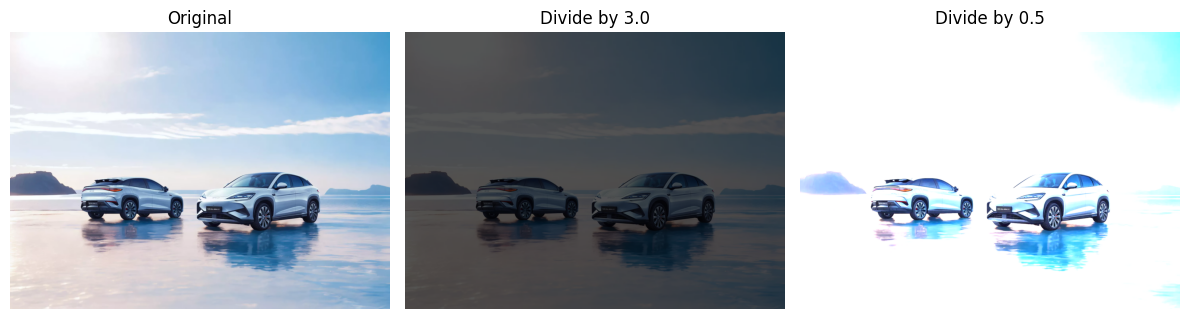

In [ ]:
# Step 4: Divide by different factors (Task 4.1 & 4.2)
# Divide by 3.0 -> darker; divide by 0.5 -> effectively multiply by 2 -> brighter
factors = [3.0, 0.5]
fig, axes = plt.subplots(1, len(factors) + 1, figsize=(4 * (len(factors) + 1), 4))
axes[0].imshow(image_RGB)
axes[0].set_title('Original')
axes[0].axis('off')
for i, f in enumerate(factors):
    div_img = cv2.divide(image_RGB, f)
    axes[i + 1].imshow(div_img)
    axes[i + 1].set_title(f'Divide by {f}')
    axes[i + 1].axis('off')
plt.tight_layout()
plt.show()
# Divide by > 1: pixel values get smaller -> darker.
# Divide by < 1: pixel values get larger -> brighter (like multiplying by 1/f).

## Submission checklist (Lab 2)
1. **Screenshots**: Save figures (e.g. right‑click → Save image) for each step.
2. **Code**: This notebook contains the code for each step.
3. **Report**: Briefly describe what you learned (effect of add/subtract/multiply/divide on brightness and contrast, and per‑channel operations).